# Exercício 2
Crie uma árvore de decisão para um conjunto de dados do seu interesse. Separe o conjunto de treinamento e teste. Treine a árvore com o conjunto de treinamento, gere a matriz de confusão para o conjunto de teste. Calcule a acurácia e teste diferentes valores para a profundidade da árvore.

In [25]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

from mlxtend.plotting import plot_confusion_matrix

In [2]:
data = fetch_california_housing()

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
X = pd.DataFrame(data=data['data'], columns=data['feature_names'])
y = pd.Series(data=data['target'], name='price')

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

### Discretizando o label Y

In [15]:
quantiles = y.quantile([.25, .5, .75]).to_list()
quantiles = [0] + quantiles + [float('inf')]
quantiles

[0, 1.196, 1.797, 2.6472499999999997, inf]

In [17]:
y_quant = pd.cut(y, bins=quantiles, labels=[0, 1, 2, 3])
y_quant.value_counts(normalize=True)

price
0    0.250097
1    0.250048
3    0.250000
2    0.249855
Name: proportion, dtype: float64

## Modelo

### Modelo

In [26]:
def decision_tree_classifier_evaluate_depths(min_depth: int, max_depth: int, x_y_dataframe: tuple):
    X, y = x_y_dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for i in range(min_depth, max_depth+1):
        model = DecisionTreeClassifier(
            criterion='entropy',
            max_depth=i,
            random_state=42,
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)

        matrix = confusion_matrix(y_test, y_pred)
        precision, recall, _, support = precision_recall_fscore_support(y_test, y_pred)

        report = (f'Tree Max Depth: {i}\n'
                  f'Accuracy: {acc}\n'
                  f'Precision: {precision}\n'
                  f'Recall: {recall}\n'
                  f'Support: {support}\n')

        plot_confusion_matrix(matrix)
        plt.title(report)
        plt.show()
    
        print('----------------------------------------------------')

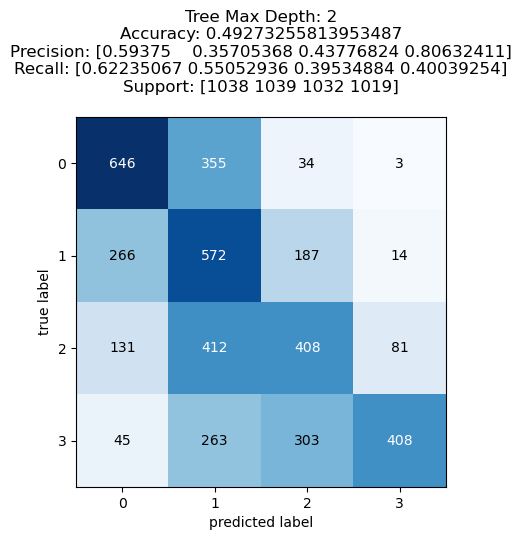

----------------------------------------------------


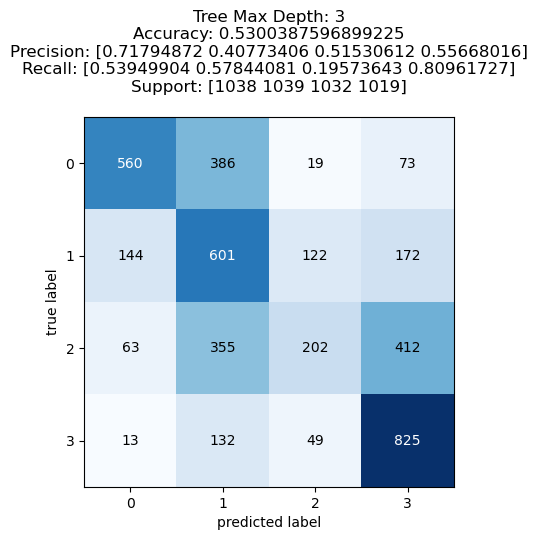

----------------------------------------------------


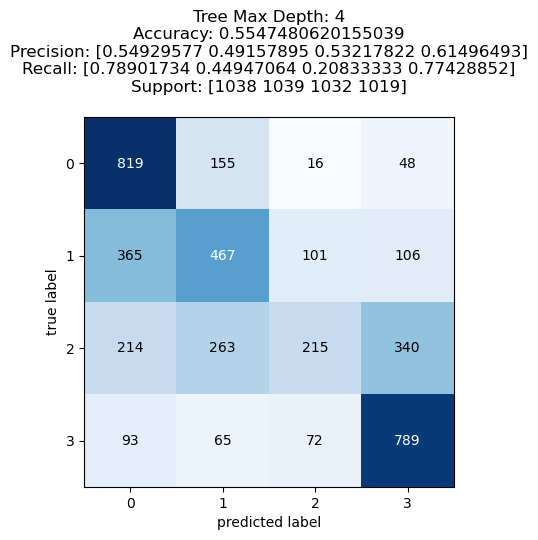

----------------------------------------------------


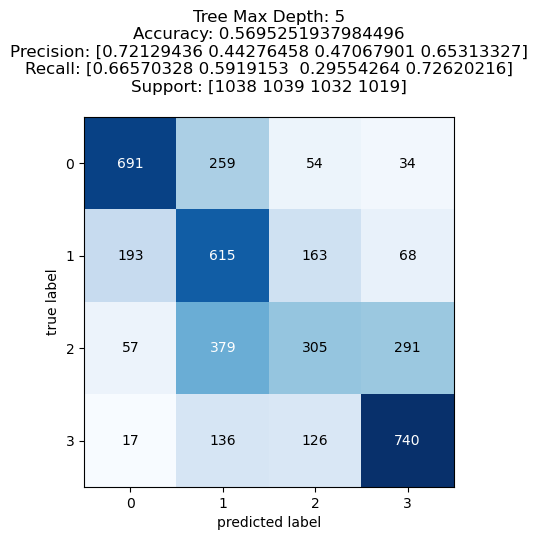

----------------------------------------------------


In [27]:
decision_tree_classifier_evaluate_depths(
    min_depth=2,
    max_depth=5,
    x_y_dataframe=(X, y_quant),
)